In [3]:
import sys
import numpy as np
from pathlib import Path
from pyPolCal.csv_tools import write_fits_info_to_csv,read_csv,read_csv_physical_model_all_bins
from pyPolCal.fitting import *
from pyPolCal.utils import *
from pyPolCal.plotting import plot_data_and_model
from pyMuellerMat.physical_models.charis_physical_models import *
from matplotlib.ticker import MultipleLocator
import matplotlib.pyplot as plt
import pandas as pd
# Plot settings that I like
plt.rcParams.update({
    #"text.usetex": True,
    #"font.family": "serif",
   # "font.serif": ["Palatino"],
    "font.size": 16,
   # "text.latex.preamble": r"\usepackage{amsmath}\usepackage{mathpazo}"
})
from pyPolCal.constants import wavelength_bins


/home/thomasmc/miniconda3/envs/charisenv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Step 1: Write FITS Info to CSV

This CSV writer will organize all relevant header information. Some header information is excluded from the extracted cubes but exists in the raw files. This function will match the info from raw headers by matching tags in the filenames. The CHARIS DPP rewrites these tags, so if you used the DPP at any point you will need to retitle all the frames to their original titles (there is a function in csv_tools.py to do this).

In [3]:
# Get paths to both processed and raw data 
# Make sure these directories have cubes with corresonding numbers
cube_dir = '/home/thomasmc/nbs_in/unpol/cubes'
raw_dir = '/home/thomasmc/nbs_in/unpol/raw'
csv_dir = '/home/thomasmc/nbs_in/unpol/csvs'

# Write all bins to csvs
for bin in range(0,22):
   csv_filepath = f'/home/thomasmc/nbs_in/unpol/csvs/bin{bin}.csv'
   write_fits_info_to_csv(cube_dir, raw_dir, csv_filepath,bin)



CSV file written to /home/thomasmc/nbs_in/unpol/csvs/bin0.csv
CSV file written to /home/thomasmc/nbs_in/unpol/csvs/bin1.csv
CSV file written to /home/thomasmc/nbs_in/unpol/csvs/bin2.csv
CSV file written to /home/thomasmc/nbs_in/unpol/csvs/bin3.csv
CSV file written to /home/thomasmc/nbs_in/unpol/csvs/bin4.csv
CSV file written to /home/thomasmc/nbs_in/unpol/csvs/bin5.csv
CSV file written to /home/thomasmc/nbs_in/unpol/csvs/bin6.csv
CSV file written to /home/thomasmc/nbs_in/unpol/csvs/bin7.csv
CSV file written to /home/thomasmc/nbs_in/unpol/csvs/bin8.csv
CSV file written to /home/thomasmc/nbs_in/unpol/csvs/bin9.csv
CSV file written to /home/thomasmc/nbs_in/unpol/csvs/bin10.csv
CSV file written to /home/thomasmc/nbs_in/unpol/csvs/bin11.csv
CSV file written to /home/thomasmc/nbs_in/unpol/csvs/bin12.csv
CSV file written to /home/thomasmc/nbs_in/unpol/csvs/bin13.csv
CSV file written to /home/thomasmc/nbs_in/unpol/csvs/bin14.csv
CSV file written to /home/thomasmc/nbs_in/unpol/csvs/bin15.csv
CS

   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         8.2715e-04                                    9.28e-02    
       1              2         2.8684e-04      5.40e-04       1.15e-02       1.06e-03    
       2              3         2.8676e-04      7.16e-08       1.34e-04       1.44e-07    
       3              4         2.8676e-04      1.33e-15       1.83e-08       4.36e-11    
`gtol` termination condition is satisfied.
Function evaluations 4, initial cost 8.2715e-04, final cost 2.8676e-04, first-order optimality 4.36e-11.
     message: `gtol` termination condition is satisfied.
     success: True
      status: 1
         fun: [-7.678e-04 -2.406e-03 ... -1.412e-03 -4.925e-03]
           x: [ 1.165e-02]
        cost: 0.00028676488163253776
         jac: [[ 3.665e-01]
               [ 7.059e-02]
               ...
               [-3.310e-01]
               [-7.652e-02]]
        grad: [ 4.312e-11]
  optimality: 4.36

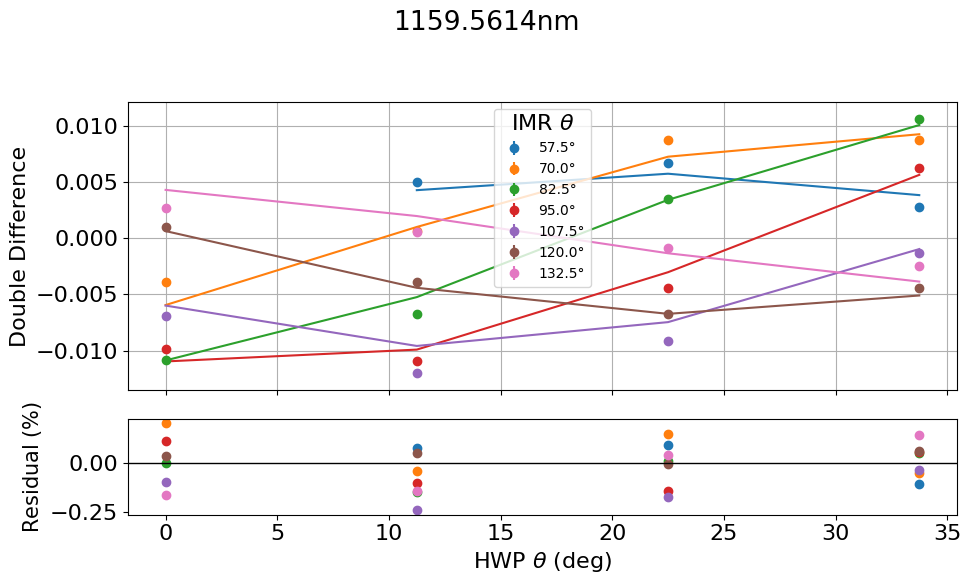

Updated Mueller Matrix:
[[ 0.49641848 -0.12919748  0.12365583 -0.4630859 ]
 [-0.49641847  0.12919748 -0.12365583  0.4630859 ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]]
108 54
Residuals range: -0.23961483774071957 0.2039060894467935
s_res: 0.13320955006635055
Error: [0.00116545]
   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         8.2565e-03                                    9.48e-02    
       1              2         7.7687e-03      4.88e-04       1.02e-02       9.56e-04    
       2              3         7.7686e-03      5.06e-08       1.05e-04       1.05e-07    
       3              4         7.7686e-03      6.11e-16       1.15e-08       4.59e-10    
`gtol` termination condition is satisfied.
Function evaluations 4, initial cost 8.2565e-03, final cost 7.7686e-03, first-order optimality 4.59e-10.
     message: `gtol` termination condition is satisfied.


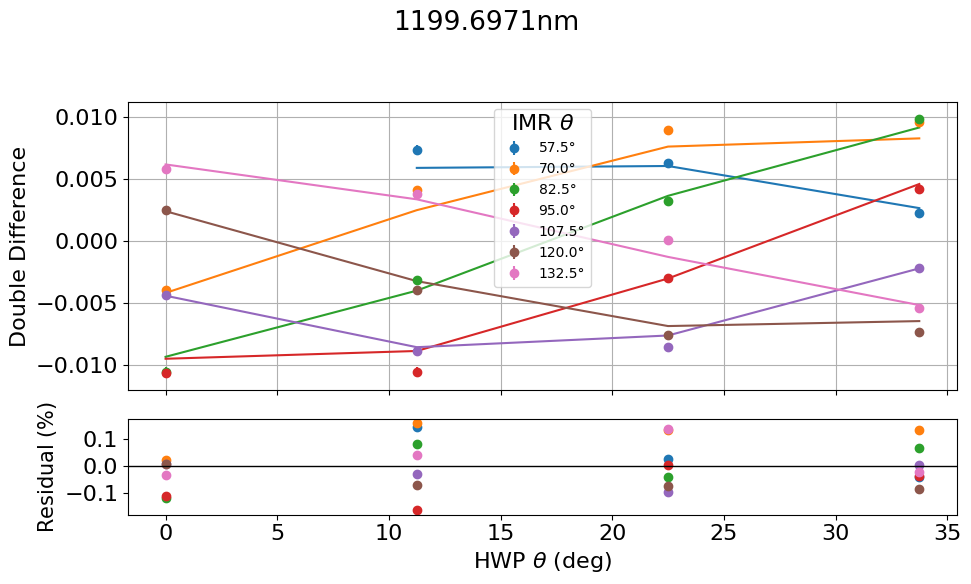

Updated Mueller Matrix:
[[ 0.49736426 -0.21504325  0.20150534 -0.39548606]
 [-0.49321078  0.21678439 -0.20321586  0.39884671]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]]
108 54
Residuals range: -0.16661658427678327 0.16007279334896657
s_res: 0.10453214941159499
Error: [0.00563943]
   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         5.5644e-03                                    1.15e-01    
       1              2         4.9402e-03      6.24e-04       1.08e-02       1.22e-03    
       2              3         4.9401e-03      7.23e-08       1.17e-04       1.46e-07    
       3              4         4.9401e-03      1.04e-15       1.40e-08       1.17e-10    
`gtol` termination condition is satisfied.
Function evaluations 4, initial cost 5.5644e-03, final cost 4.9401e-03, first-order optimality 1.17e-10.
     message: `gtol` termination condition is satisfied.

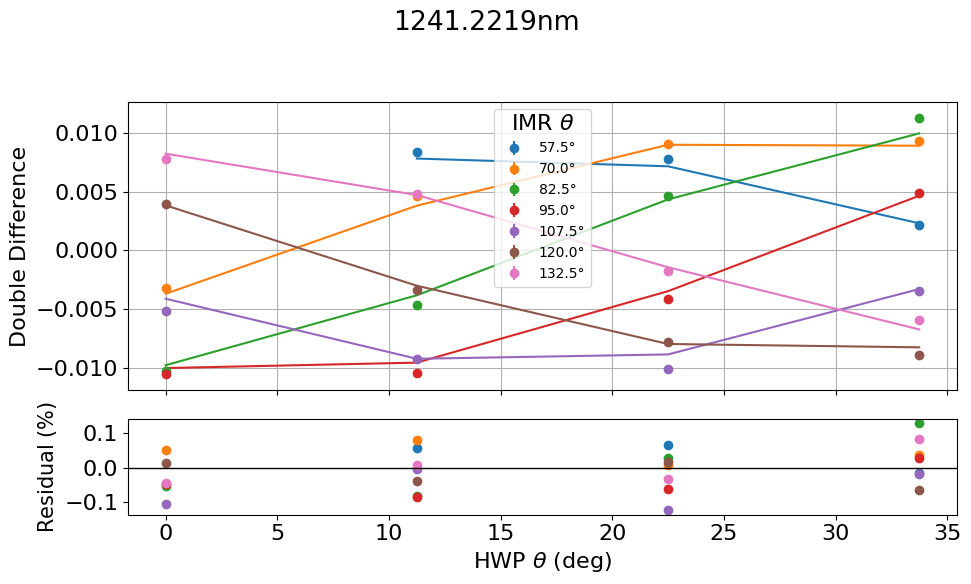

Updated Mueller Matrix:
[[ 0.49831678 -0.27615647  0.25154426 -0.32511664]
 [-0.49521459  0.27783959 -0.25313801  0.32717835]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]]
108 54
Residuals range: -0.12292346929691589 0.1275166019507793
s_res: 0.07259229461802792
Error: [0.00420307]
   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         6.0387e-03                                    1.26e-01    
       1              2         5.3638e-03      6.75e-04       1.06e-02       1.32e-03    
       2              3         5.3637e-03      7.65e-08       1.14e-04       1.53e-07    
       3              4         5.3637e-03      1.03e-15       1.33e-08       7.97e-11    
`gtol` termination condition is satisfied.
Function evaluations 4, initial cost 6.0387e-03, final cost 5.3637e-03, first-order optimality 7.97e-11.
     message: `gtol` termination condition is satisfied.


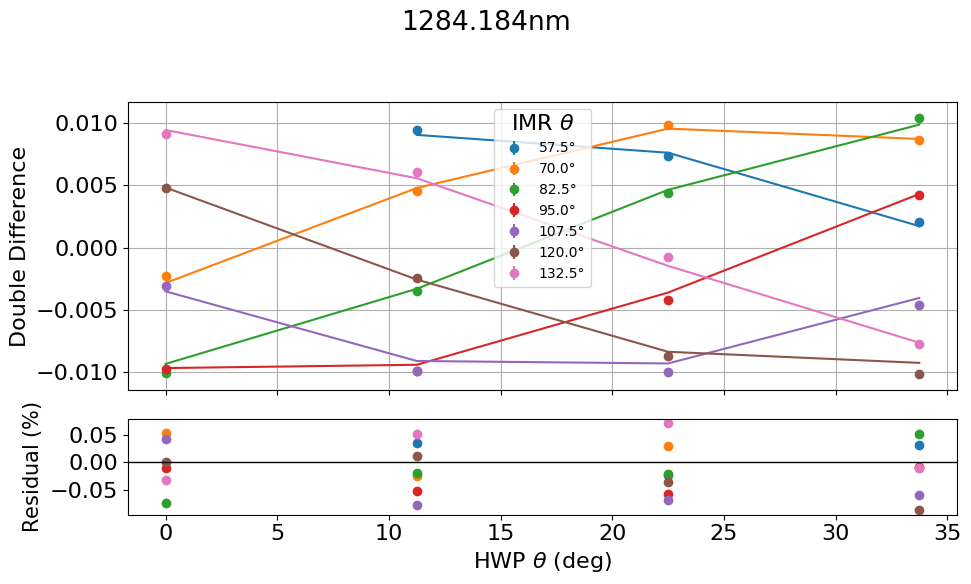

Updated Mueller Matrix:
[[ 0.49911504 -0.33163581  0.28739408 -0.21478308]
 [-0.48857834  0.33866441 -0.29368028  0.21948461]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]]
108 54
Residuals range: -0.08789686768484128 0.07179560735709918
s_res: 0.054866844315182135
Error: [0.00416477]
   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         9.0289e-03                                    1.37e-01    
       1              2         8.2634e-03      7.66e-04       1.10e-02       1.50e-03    
       2              3         8.2633e-03      9.32e-08       1.23e-04       1.86e-07    
       3              4         8.2633e-03      1.43e-15       1.53e-08       1.42e-09    
`gtol` termination condition is satisfied.
Function evaluations 4, initial cost 9.0289e-03, final cost 8.2633e-03, first-order optimality 1.42e-09.
     message: `gtol` termination condition is satisfied

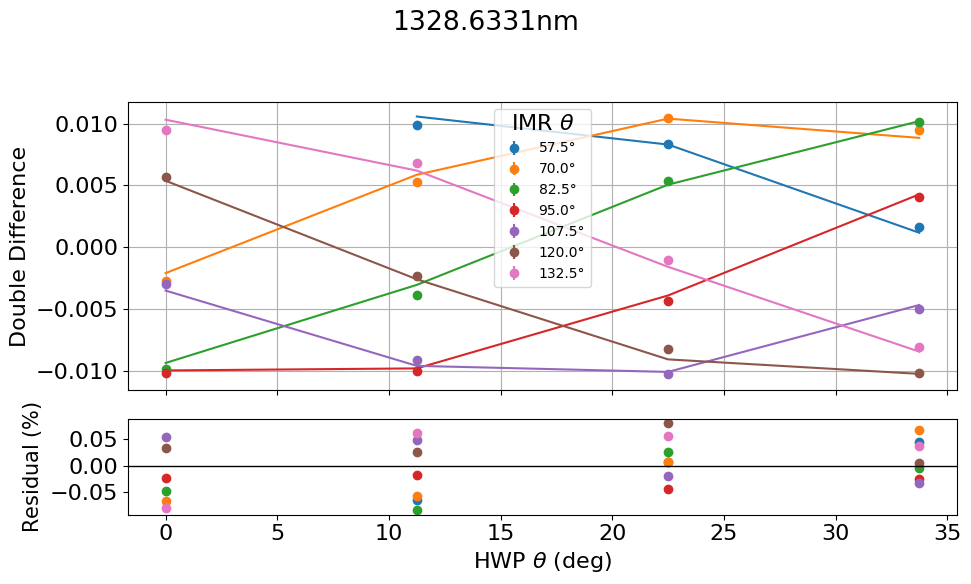

Updated Mueller Matrix:
[[ 0.50005808 -0.38506887  0.27698208  0.08454241]
 [-0.48181298  0.39950192 -0.28765628 -0.0878031 ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]]
108 54
Residuals range: -0.08375191541417781 0.08009687927715192
s_res: 0.05689630086203869
Error: [0.00503336]
   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         9.1618e-03                                    1.33e-01    
       1              2         8.4128e-03      7.49e-04       1.11e-02       1.47e-03    
       2              3         8.4127e-03      9.24e-08       1.25e-04       1.85e-07    
       3              4         8.4127e-03      1.48e-15       1.58e-08       2.65e-10    
`gtol` termination condition is satisfied.
Function evaluations 4, initial cost 9.1618e-03, final cost 8.4127e-03, first-order optimality 2.65e-10.
     message: `gtol` termination condition is satisfied.

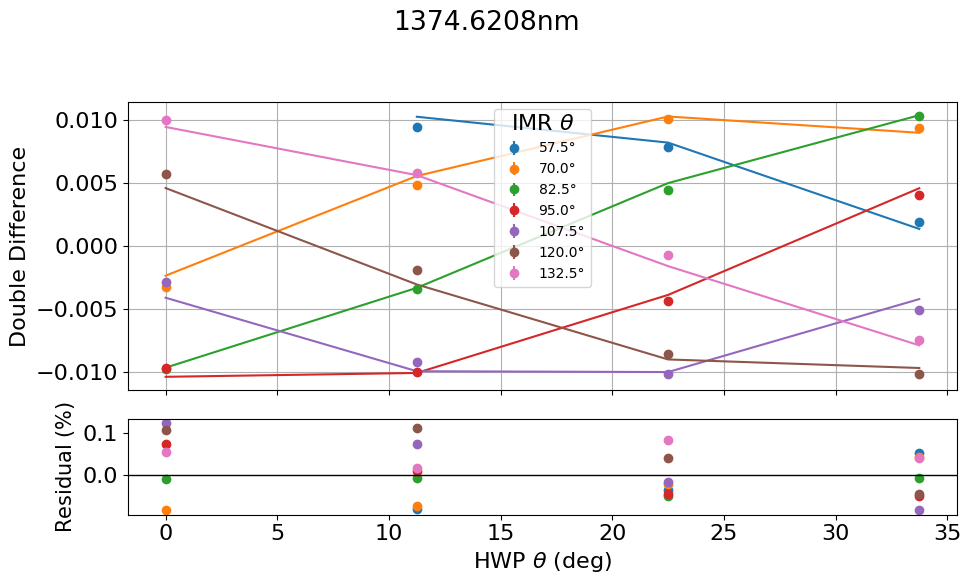

Updated Mueller Matrix:
[[ 0.49999881 -0.37456915  0.23303306  0.22241111]
 [-0.49403729  0.37903181 -0.23589116 -0.2251416 ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]]
108 54
Residuals range: -0.08568804811028496 0.12386566299386276
s_res: 0.0752307425385917
Error: [0.00516917]
   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         5.4810e-03                                    1.16e-01    
       1              2         4.8389e-03      6.42e-04       1.09e-02       1.26e-03    
       2              3         4.8388e-03      7.65e-08       1.20e-04       1.55e-07    
       3              4         4.8388e-03      1.17e-15       1.49e-08       1.58e-10    
`gtol` termination condition is satisfied.
Function evaluations 4, initial cost 5.4810e-03, final cost 4.8388e-03, first-order optimality 1.58e-10.
     message: `gtol` termination condition is satisfied.


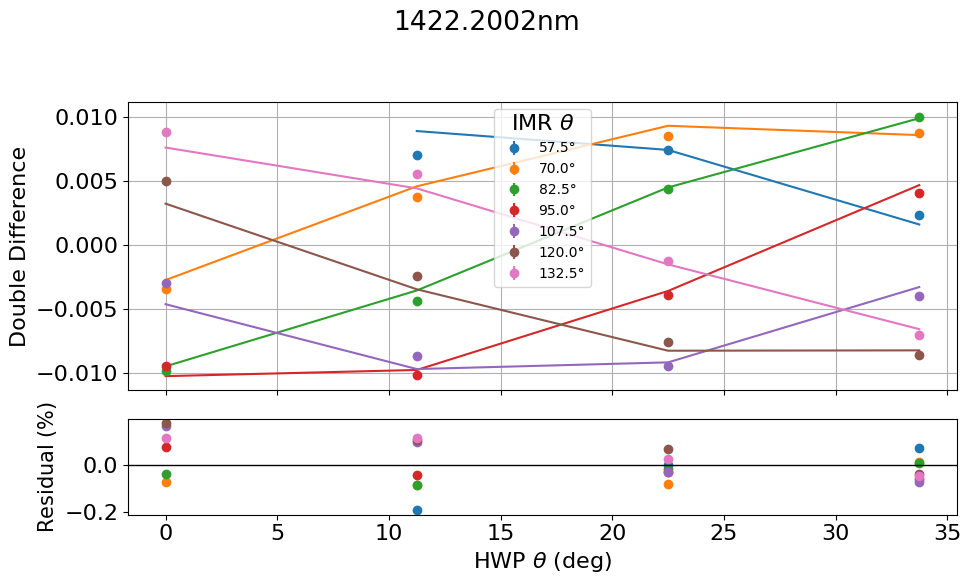

Updated Mueller Matrix:
[[ 0.49963493 -0.33619349  0.17230303  0.31765044]
 [-0.49357452  0.34024891 -0.17444818 -0.3216103 ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]]
108 54
Residuals range: -0.1909698546284796 0.17958127930760548
s_res: 0.10359383939091676
Error: [0.0041618]
   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         4.8668e-03                                    9.65e-02    
       1              2         4.3466e-03      5.20e-04       1.07e-02       1.02e-03    
       2              3         4.3465e-03      5.92e-08       1.15e-04       1.22e-07    
       3              4         4.3465e-03      8.53e-16       1.38e-08       3.83e-10    
`gtol` termination condition is satisfied.
Function evaluations 4, initial cost 4.8668e-03, final cost 4.3465e-03, first-order optimality 3.83e-10.
     message: `gtol` termination condition is satisfied.
 

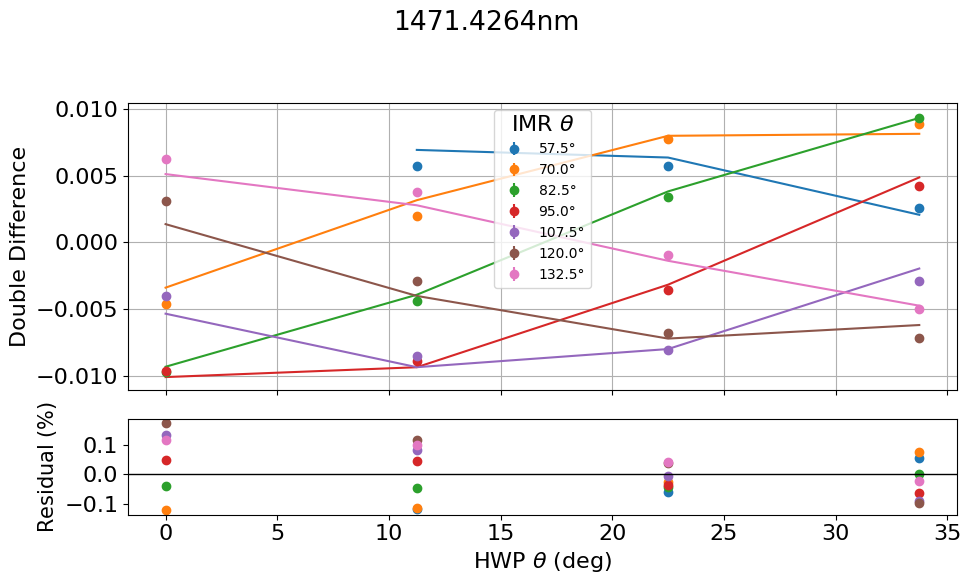

Updated Mueller Matrix:
[[ 0.49897551 -0.2720316   0.08896068  0.40184284]
 [-0.49334816  0.27504885 -0.08998499 -0.40648117]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]]
108 54
Residuals range: -0.12250885719476506 0.17260621858626848
s_res: 0.09796082084368156
Error: [0.00427975]
   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         3.5589e-03                                    8.23e-02    
       1              2         3.1260e-03      4.33e-04       1.04e-02       8.48e-04    
       2              3         3.1260e-03      4.70e-08       1.10e-04       9.67e-08    
       3              4         3.1260e-03      6.11e-16       1.25e-08       2.01e-10    
`gtol` termination condition is satisfied.
Function evaluations 4, initial cost 3.5589e-03, final cost 3.1260e-03, first-order optimality 2.01e-10.
     message: `gtol` termination condition is satisfied.

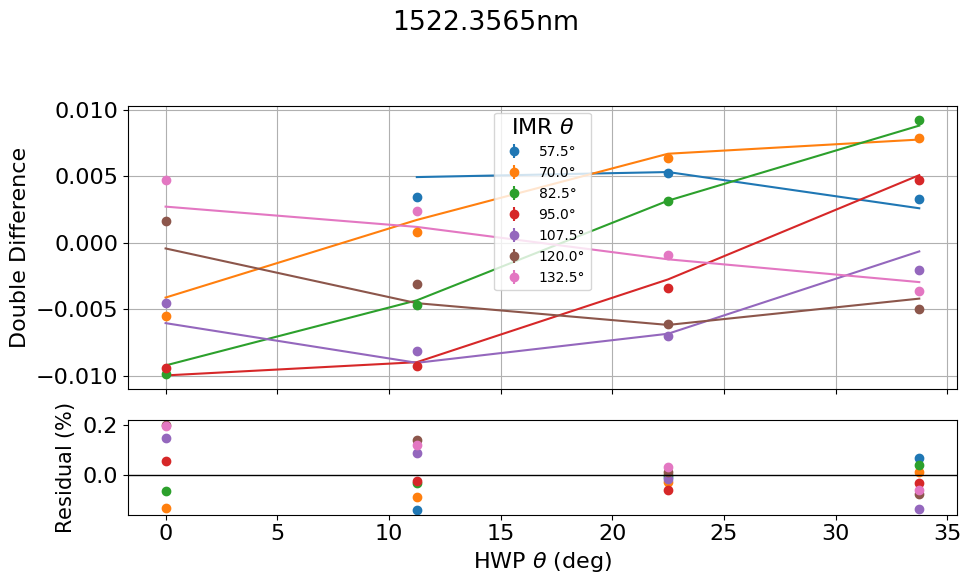

Updated Mueller Matrix:
[[ 0.49827244 -0.20066778  0.00797432  0.45008043]
 [-0.49285194  0.20277829 -0.0080604  -0.45507243]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]]
108 54
Residuals range: -0.1463197871361424 0.20379758110605628
s_res: 0.11397102190635706
Error: [0.00388381]
   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         1.1626e-03                                    7.24e-02    
       1              2         8.0014e-04      3.62e-04       9.91e-03       7.11e-04    
       2              3         8.0011e-04      3.56e-08       9.92e-05       7.26e-08    
       3              4         8.0011e-04      3.67e-16       1.01e-08       1.85e-10    
`gtol` termination condition is satisfied.
Function evaluations 4, initial cost 1.1626e-03, final cost 8.0011e-04, first-order optimality 1.85e-10.
     message: `gtol` termination condition is satisfied.


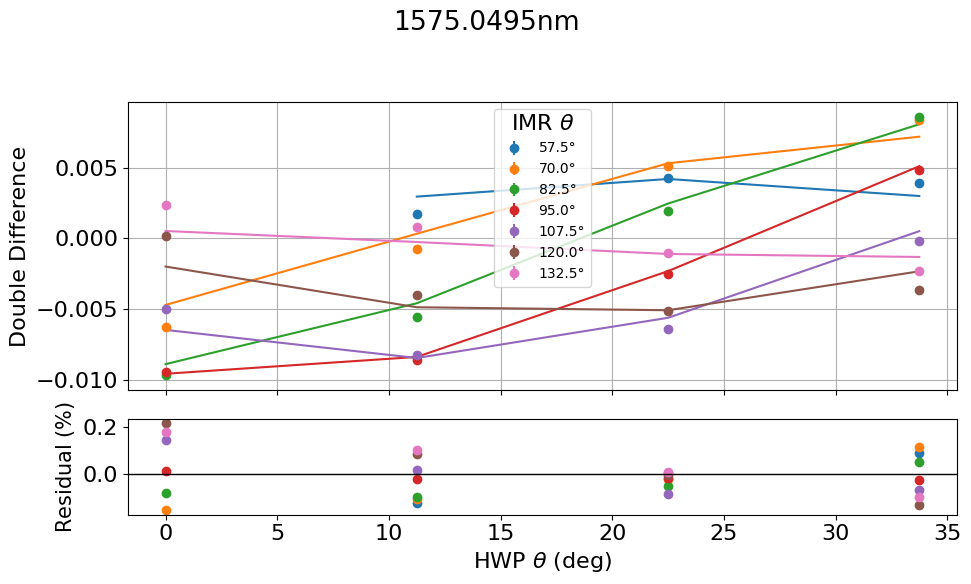

Updated Mueller Matrix:
[[ 0.49757469 -0.12929054 -0.06476747  0.47053442]
 [-0.492253    0.13058799  0.06547342 -0.47564702]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]]
108 54
Residuals range: -0.15320004546961458 0.21698408642031802
s_res: 0.1148727043628439
Error: [0.00204265]
   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         4.6623e-03                                    7.22e-02    
       1              2         4.2961e-03      3.66e-04       1.00e-02       7.18e-04    
       2              3         4.2960e-03      3.70e-08       1.02e-04       7.80e-08    
       3              4         4.2960e-03      4.34e-16       1.11e-08       1.09e-09    
`gtol` termination condition is satisfied.
Function evaluations 4, initial cost 4.6623e-03, final cost 4.2960e-03, first-order optimality 1.09e-09.
     message: `gtol` termination condition is satisfied.


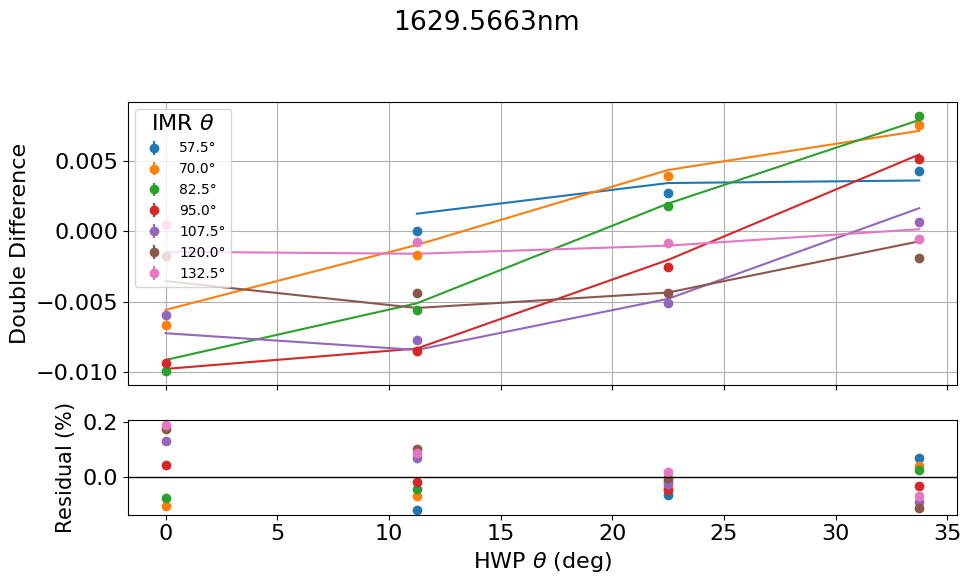

Updated Mueller Matrix:
[[ 0.49697869 -0.05737163 -0.13129132  0.46954421]
 [-0.49091758  0.05795754  0.13291821 -0.47535342]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]]
108 54
Residuals range: -0.1237087853941292 0.19104778243047948
s_res: 0.10114531908911781
Error: [0.00477452]
   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         5.2956e-03                                    7.32e-02    
       1              2         4.9308e-03      3.65e-04       9.87e-03       7.16e-04    
       2              3         4.9308e-03      3.56e-08       9.84e-05       7.45e-08    
       3              4         4.9308e-03      3.86e-16       1.02e-08       7.15e-11    
`gtol` termination condition is satisfied.
Function evaluations 4, initial cost 5.2956e-03, final cost 4.9308e-03, first-order optimality 7.15e-11.
     message: `gtol` termination condition is satisfied.


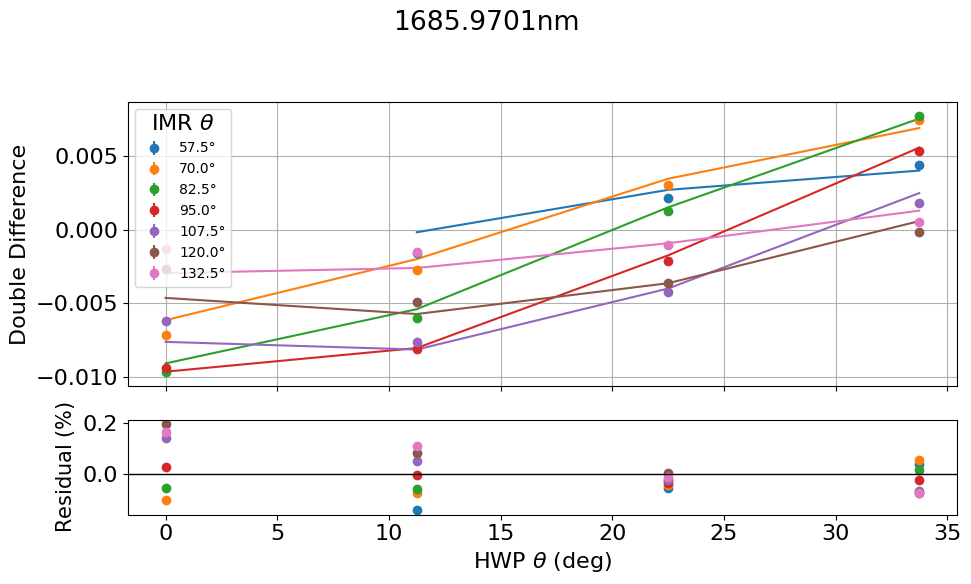

Updated Mueller Matrix:
[[ 0.49649126  0.00216714 -0.18092828  0.45542448]
 [-0.49005159 -0.00232476  0.18330742 -0.46140646]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]]
108 54
Residuals range: -0.14274523869429884 0.19288322130876556
s_res: 0.0964475438228738
Error: [0.00503288]
   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         1.5635e-03                                    7.28e-02    
       1              2         1.2197e-03      3.44e-04       9.36e-03       6.75e-04    
       2              3         1.2197e-03      3.01e-08       8.84e-05       6.09e-08    
       3              4         1.2197e-03      2.46e-16       7.98e-09       2.57e-11    
`gtol` termination condition is satisfied.
Function evaluations 4, initial cost 1.5635e-03, final cost 1.2197e-03, first-order optimality 2.57e-11.
     message: `gtol` termination condition is satisfied.


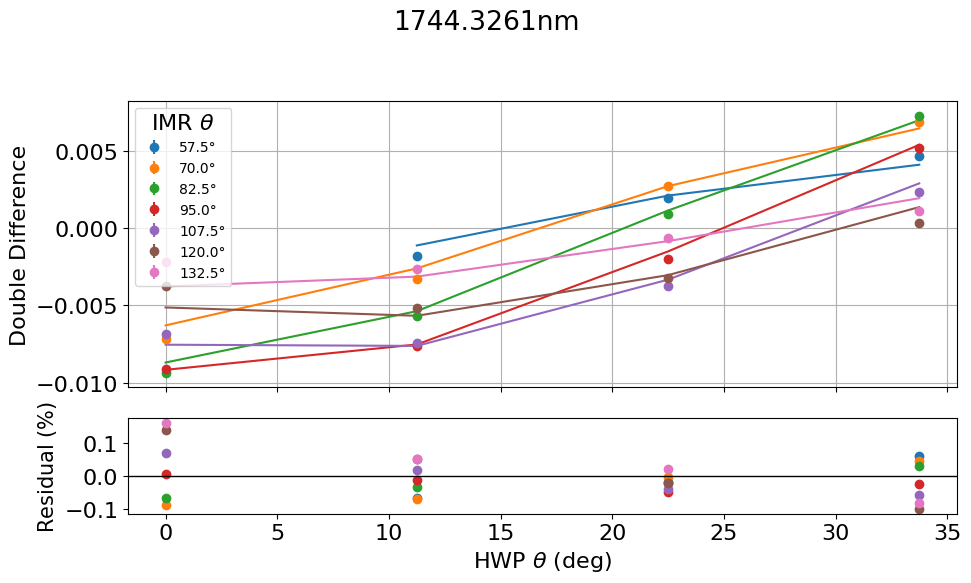

Updated Mueller Matrix:
[[ 0.49620012  0.04511439 -0.21258615  0.43973255]
 [-0.49050219 -0.04574552  0.21505272 -0.44483002]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]]
108 54
Residuals range: -0.10073469476581193 0.16086857314816871
s_res: 0.07621860589300482
Error: [0.00244429]
   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         4.4678e-04                                    7.39e-02    
       1              2         1.0627e-04      3.41e-04       9.13e-03       6.69e-04    
       2              3         1.0624e-04      2.84e-08       8.41e-05       5.65e-08    
       3              4         1.0624e-04      2.02e-16       7.11e-09       3.67e-12    
`gtol` termination condition is satisfied.
Function evaluations 4, initial cost 4.4678e-04, final cost 1.0624e-04, first-order optimality 3.67e-12.
     message: `gtol` termination condition is satisfied.

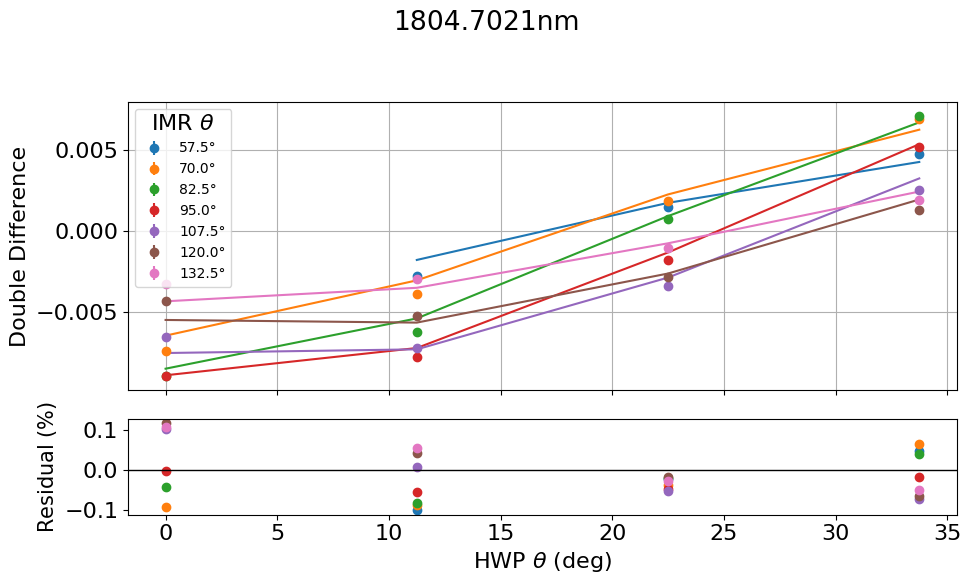

Updated Mueller Matrix:
[[ 0.49601499  0.07915519 -0.23378035  0.42281917]
 [-0.48958588 -0.08031014  0.23684249 -0.42835297]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]]
108 54
Residuals range: -0.10093984891381719 0.11630290670657417
s_res: 0.07508794650292237
Error: [0.00070667]
   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         2.8475e-03                                    7.30e-02    
       1              2         2.5302e-03      3.17e-04       8.62e-03       6.24e-04    
       2              3         2.5301e-03      2.36e-08       7.50e-05       4.58e-08    
       3              4         2.5301e-03      1.24e-16       5.51e-09       2.96e-10    
`gtol` termination condition is satisfied.
Function evaluations 4, initial cost 2.8475e-03, final cost 2.5301e-03, first-order optimality 2.96e-10.
     message: `gtol` termination condition is satisfied.

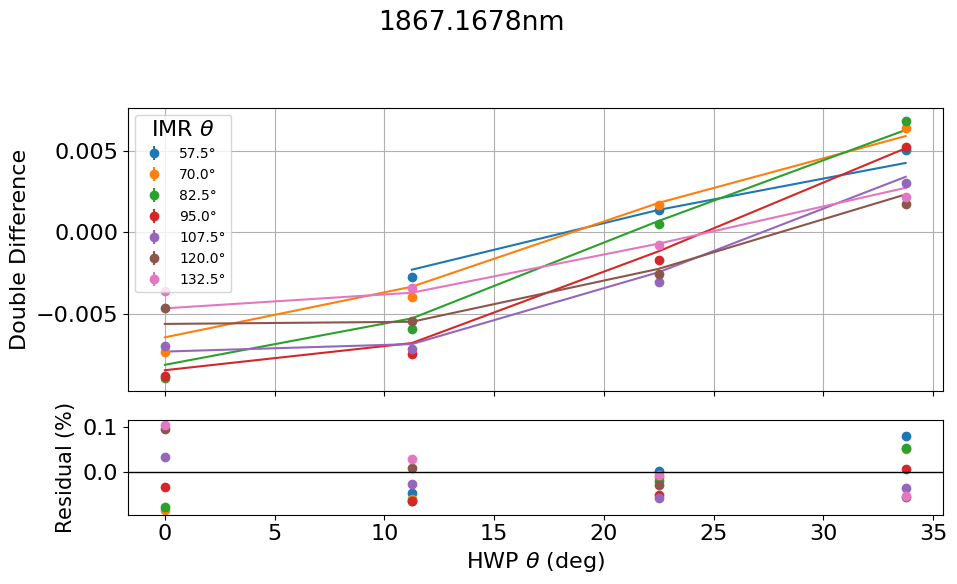

Updated Mueller Matrix:
[[ 0.49590467  0.10963155 -0.25013656  0.40615046]
 [-0.48943346 -0.11118799  0.25343213 -0.41149773]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]]
108 54
Residuals range: -0.08705742849712605 0.1058945686683781
s_res: 0.06504113622126513
Error: [0.00337398]
   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         6.4340e-03                                    7.33e-02    
       1              2         6.1222e-03      3.12e-04       8.44e-03       6.13e-04    
       2              3         6.1221e-03      2.22e-08       7.18e-05       4.33e-08    
       3              4         6.1221e-03      1.16e-16       5.07e-09       8.25e-10    
`gtol` termination condition is satisfied.
Function evaluations 4, initial cost 6.4340e-03, final cost 6.1221e-03, first-order optimality 8.25e-10.
     message: `gtol` termination condition is satisfied.


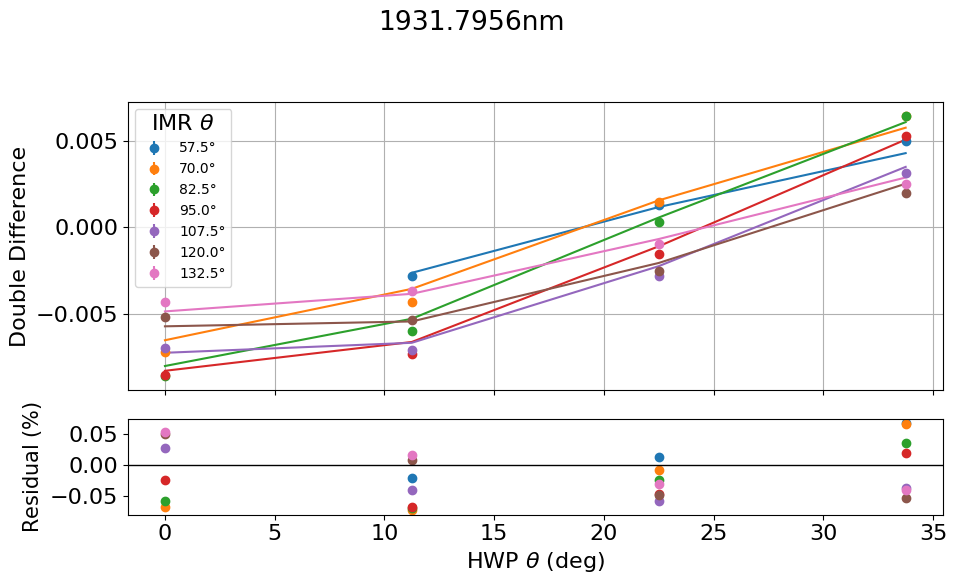

Updated Mueller Matrix:
[[ 0.49586729  0.12933448 -0.25598516  0.39609222]
 [-0.48902393 -0.13125262  0.25955246 -0.40160826]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]]
108 54
Residuals range: -0.07354352670055825 0.06840480027841367
s_res: 0.05556159730899798
Error: [0.00518051]
   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         8.5478e-03                                    7.36e-02    
       1              2         8.2389e-03      3.09e-04       8.33e-03       6.08e-04    
       2              3         8.2389e-03      2.14e-08       6.99e-05       4.14e-08    
       3              4         8.2389e-03      9.54e-17       4.77e-09       1.96e-10    
`gtol` termination condition is satisfied.
Function evaluations 4, initial cost 8.5478e-03, final cost 8.2389e-03, first-order optimality 1.96e-10.
     message: `gtol` termination condition is satisfied.

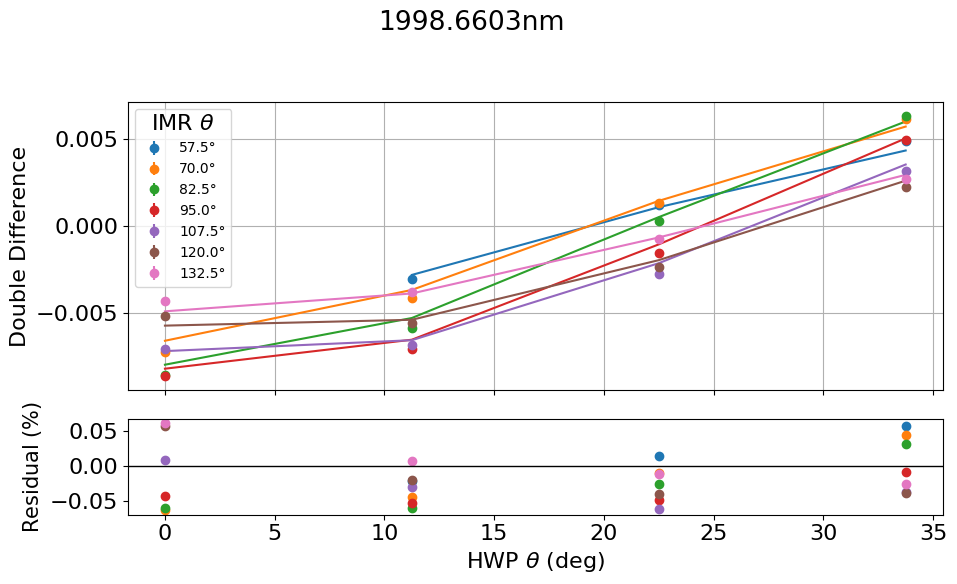

Updated Mueller Matrix:
[[ 0.49587237  0.14205884 -0.25486778  0.39410835]
 [-0.49036654 -0.1437383   0.2577165  -0.39851044]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]]
108 54
Residuals range: -0.06290893237176454 0.06148985272658808
s_res: 0.0485727591191934
Error: [0.0059545]
   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         8.1280e-03                                    7.32e-02    
       1              2         7.8233e-03      3.05e-04       8.26e-03       5.99e-04    
       2              3         7.8233e-03      2.08e-08       6.87e-05       4.17e-08    
       3              4         7.8233e-03      8.50e-17       4.78e-09       4.80e-10    
`gtol` termination condition is satisfied.
Function evaluations 4, initial cost 8.1280e-03, final cost 7.8233e-03, first-order optimality 4.80e-10.
     message: `gtol` termination condition is satisfied.
 

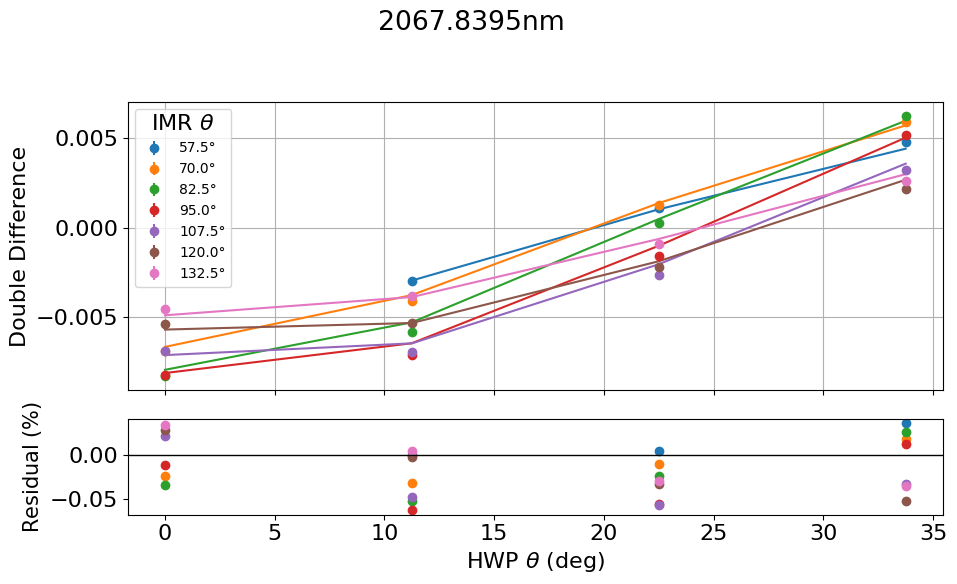

Updated Mueller Matrix:
[[ 0.49590397  0.15267142 -0.24931559  0.39179207]
 [-0.48884294 -0.15498253  0.25289934 -0.39742   ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]]
108 54
Residuals range: -0.0635987411607245 0.03718530916261409
s_res: 0.040813656707943
Error: [0.00579337]
   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         9.7202e-03                                    7.24e-02    
       1              2         9.4227e-03      2.98e-04       8.15e-03       5.86e-04    
       2              3         9.4226e-03      1.98e-08       6.70e-05       3.93e-08    
       3              4         9.4226e-03      8.67e-17       4.50e-09       2.66e-10    
`gtol` termination condition is satisfied.
Function evaluations 4, initial cost 9.7202e-03, final cost 9.4226e-03, first-order optimality 2.66e-10.
     message: `gtol` termination condition is satisfied.
  

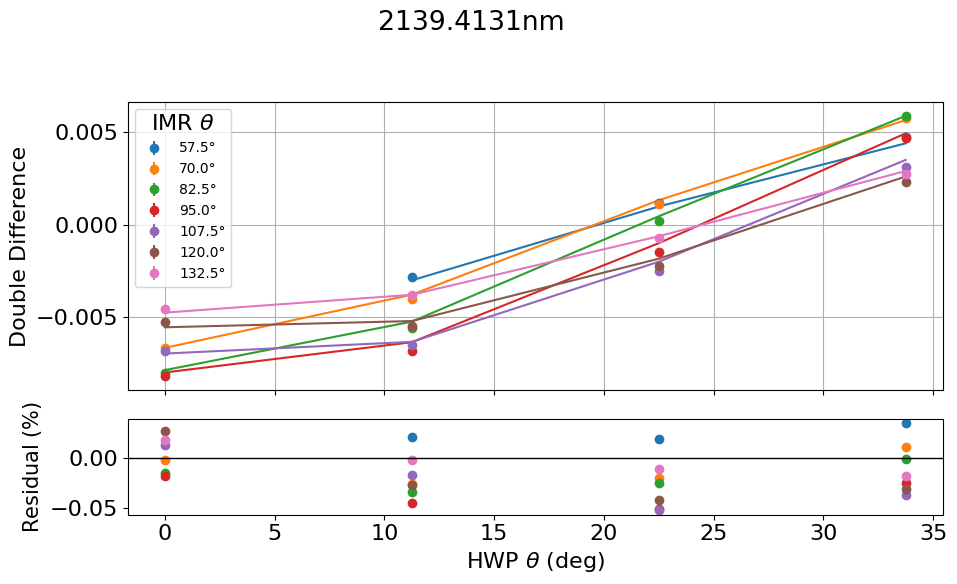

Updated Mueller Matrix:
[[ 0.49595507  0.16010184 -0.23920753  0.39578502]
 [-0.48938557 -0.16234721  0.24240262 -0.40106782]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]]
108 54
Residuals range: -0.05207894349187822 0.03453023765505686
s_res: 0.03253714567215365
Error: [0.00635301]
   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         1.1130e-02                                    7.17e-02    
       1              2         1.0833e-02      2.98e-04       8.23e-03       5.86e-04    
       2              3         1.0833e-02      2.02e-08       6.83e-05       4.00e-08    
       3              4         1.0833e-02      9.89e-17       4.66e-09       7.31e-10    
`gtol` termination condition is satisfied.
Function evaluations 4, initial cost 1.1130e-02, final cost 1.0833e-02, first-order optimality 7.31e-10.
     message: `gtol` termination condition is satisfied.

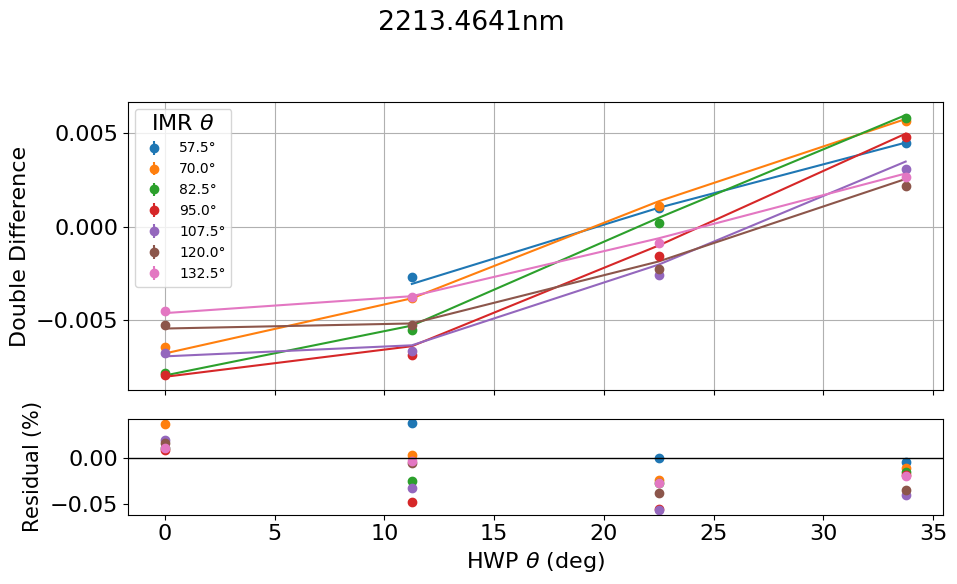

Updated Mueller Matrix:
[[ 0.49601836  0.16399719 -0.2226746   0.40056477]
 [-0.48675522 -0.16725438  0.22689033 -0.40814264]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]]
108 54
Residuals range: -0.057270978047639476 0.0374172483284565
s_res: 0.03384049498765118
Error: [0.00687594]
   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         1.0787e-02                                    7.03e-02    
       1              2         1.0493e-02      2.94e-04       8.30e-03       5.78e-04    
       2              3         1.0493e-02      2.02e-08       6.94e-05       4.13e-08    
       3              4         1.0493e-02      9.71e-17       4.95e-09       1.69e-11    
`gtol` termination condition is satisfied.
Function evaluations 4, initial cost 1.0787e-02, final cost 1.0493e-02, first-order optimality 1.69e-11.
     message: `gtol` termination condition is satisfied.

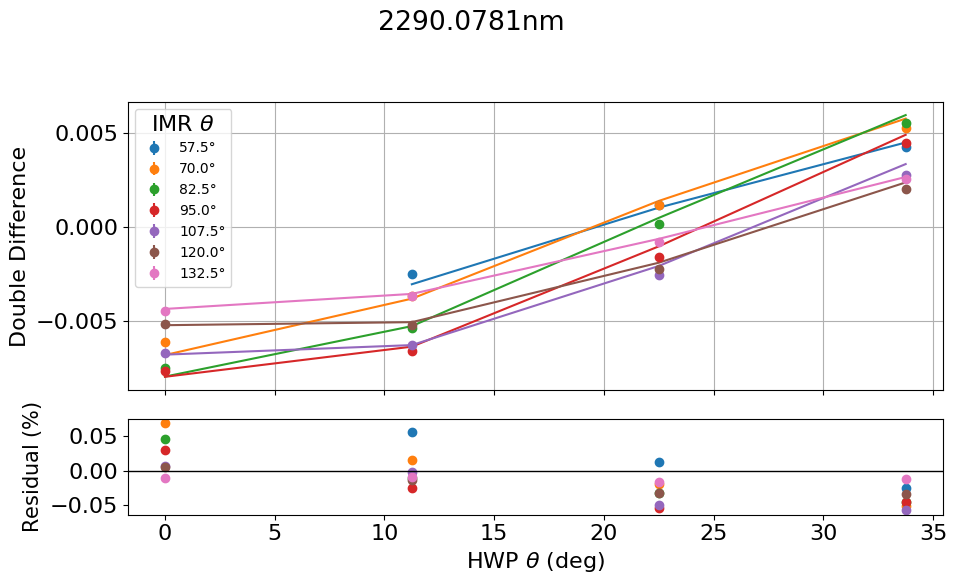

Updated Mueller Matrix:
[[ 0.49610119  0.16580116 -0.20091695  0.40713315]
 [-0.48333662 -0.17036899  0.20619527 -0.41781999]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]]
108 54
Residuals range: -0.05753287848717703 0.06914342171591892
s_res: 0.04150578932984036
Error: [0.00686529]
   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         1.2562e-02                                    6.87e-02    
       1              2         1.2263e-02      2.99e-04       8.62e-03       5.87e-04    
       2              3         1.2263e-02      2.22e-08       7.50e-05       4.48e-08    
       3              4         1.2263e-02      1.16e-16       5.72e-09       1.04e-09    
`gtol` termination condition is satisfied.
Function evaluations 4, initial cost 1.2562e-02, final cost 1.2263e-02, first-order optimality 1.04e-09.
     message: `gtol` termination condition is satisfied.

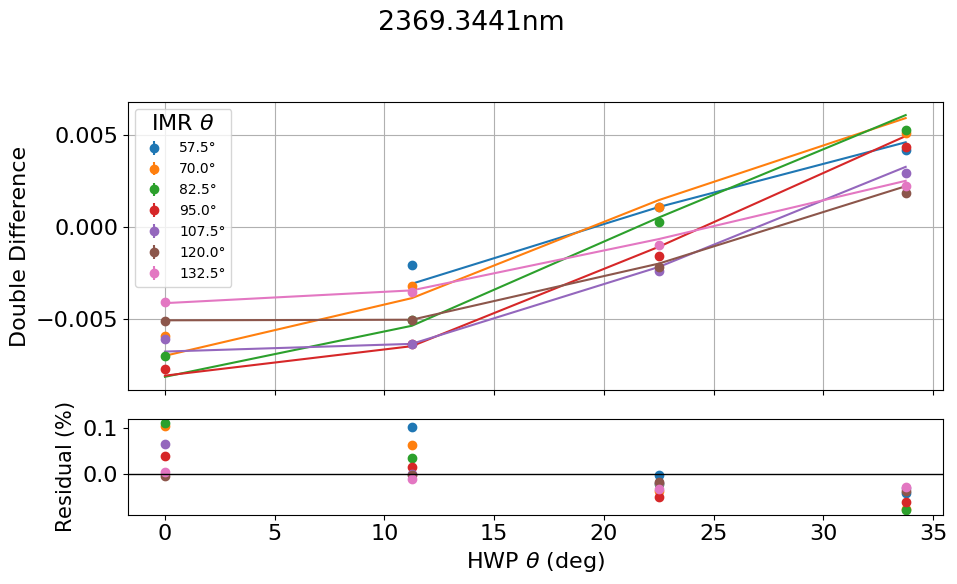

Updated Mueller Matrix:
[[ 0.49619196  0.16496126 -0.17302649  0.40750941]
 [-0.47245401 -0.17361776  0.18167237 -0.42785158]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]]
108 54
Residuals range: -0.08114560306322371 0.11142665712325339
s_res: 0.06237857001906278
Error: [0.00765655]


In [4]:
# Fit all 22 wavelength bins
from pyPolCal.instruments import fit_CHARIS_Mueller_matrix_by_bin_nbs_unpol
from pathlib import Path
errors = []
sres_list = []
for bin in range(0,22):
    error,fig,ax,sres = fit_CHARIS_Mueller_matrix_by_bin_nbs_unpol(
        f'../datacsvs/nbs_in_internalcal_unpol_no_45_derotator/bin{bin}.csv',bin,
        Path(f'../system_dictionaries/nbs_in_unpol_internalcal/bin{bin}.json'),
    )
    errors.append(error)
    sres_list.append(sres)



In [5]:
# find average error
import numpy as np
errors = np.array(errors)
print('eps', np.mean(errors[:,0]))



eps 0.004579762158194772


Text(0.5, 1.0, 'Polarimetric Accuracy')

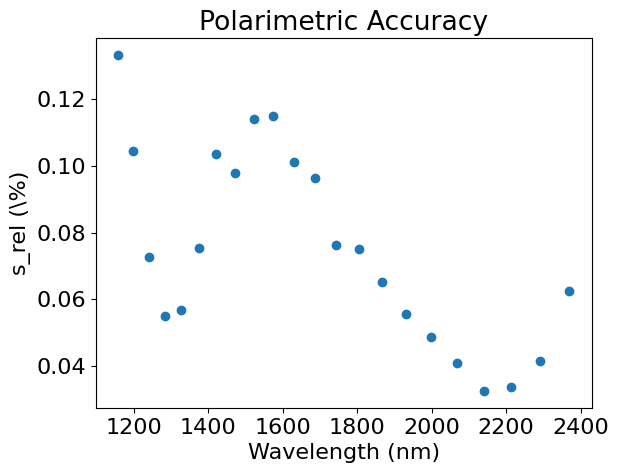

In [6]:
# plot pol accuracy
import matplotlib.pyplot as plt
from pyPolCal.constants import wavelength_bins
plt.scatter(wavelength_bins,sres_list)
plt.xlabel('Wavelength (nm)')
plt.ylabel('s_rel (\%)')
plt.title('Polarimetric Accuracy')

`model_data` will list out all of your fits in a data frame.

In [7]:
from pyPolCal.csv_tools import model_data
json_dir = '../system_dictionaries/nbs_in_unpol_internalcal'
df = model_data(json_dir, offsets=False)
df

,wavelength_bin,lp_epsilon
0,1159.5614,0.011647
1,1199.6971,0.010288
2,1241.2219,0.010877
3,1284.1840,0.010756
4,1328.6331,0.011154
5,1374.6208,0.011230
6,1422.2002,0.011037
7,1471.4264,0.010779
8,1522.3565,0.010523
9,1575.0495,0.010009


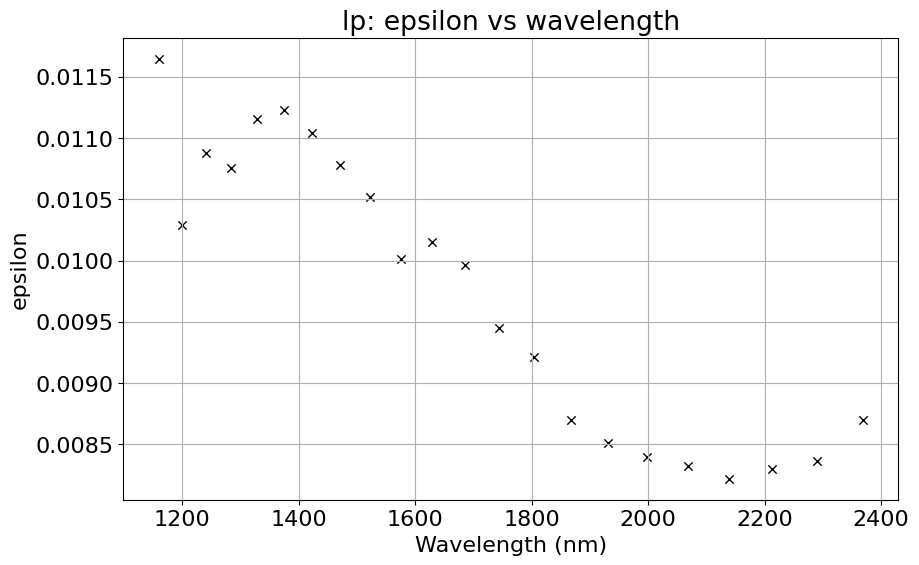

In [8]:
from pyPolCal.plotting import plot_config_dict_vs_wavelength
params, fig, ax = plot_config_dict_vs_wavelength('lp', 'epsilon', json_dir)
#fig, ax = plt.subplots(figsize=(10,6))
#ax.scatter(wavelength_bins, np.rad2deg(params))
#ax.plot(wavelength_bins,np.rad2deg((IMR_retardance(wavelength_bins,264.14673))), label='IMR Retardance Model', color='black', linestyle='--')